<a href="https://colab.research.google.com/github/cizzeso/DTS22_TS4/blob/kristanto-setyo-utomo/ts4_kris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library yang diperlukan untuk mengolah data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Menghubungkan dengan drive penyimpan data (google)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengarahkan ke file sumber data yang akan diolah pada drive sebagai dataset dan menjadikan 'Date' sebagai kolom index

In [3]:
#ubah pathnya sesuai lokasi dataset 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_impact_on_airport_traffic.csv',index_col="Date",parse_dates=True)

In [4]:
df.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-04-03,Daily,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-04-13,Daily,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-07-10,Daily,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-09-02,Daily,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-10-31,Daily,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
df.tail()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-06-05,Daily,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
2020-10-03,Daily,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
2020-07-16,Daily,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
2020-07-31,Daily,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
2020-08-30,Daily,1.0,Seattle-Tacoma International,68,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [6]:
# cek masing-masing kolom 

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7247 entries, 2020-04-03 to 2020-08-30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Version            7247 non-null   float64
 2   AirportName        7247 non-null   object 
 3   PercentOfBaseline  7247 non-null   int64  
 4   Centroid           7247 non-null   object 
 5   City               7247 non-null   object 
 6   State              7247 non-null   object 
 7   ISO_3166_2         7247 non-null   object 
 8   Country            7247 non-null   object 
 9   Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 622.8+ KB


Mengecek type dari masing-masing data

In [7]:
# kolom 'Date' masih memiliki object type. maka harus diubah ke type datetime

df.dtypes

AggregationMethod     object
Version              float64
AirportName           object
PercentOfBaseline      int64
Centroid              object
City                  object
State                 object
ISO_3166_2            object
Country               object
Geography             object
dtype: object

In [8]:
# Check the null values
df.isnull().sum()

AggregationMethod    0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [9]:
# Check the values
df.isna().sum()

AggregationMethod    0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [10]:
df.describe(include='all')

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,NaN,28,NaN,28,27,23,23,4,28
top,Daily,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-84.4279188822754 33.6410758198944),New York,New York,US-NY,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
freq,7247,NaN,262,NaN,262,523,523,523,4441,262
mean,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.0,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.0,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN


Kesimpulan:
- Terdapat 4 countries, 23 states, 27 cities dan 28 airports pada dataset.
- Centroid and Country merupakan data POINT and POLYGON, yang menunjukkan lokasi geografi/koordinat (geographical locations).
  - data koodrinat ini digunakan untuk analisis diskriptif dan visualisasi untuk mengetahui insight dari dataset yang tersedia
- Dari hasil tersebut juga terlihat bahwa dataset tidak memiliki missing value.
- Modeling dilakukan menggunakan index 'Date' dan variabel 'PercentOfBaseline' yang menunjukkan persentase dari volume lalu lintas (traffic) menuju dan dari bandara yang dibandingkan (persentase) dengan periode baseline (1 februari 2020 hingga 15 maret 2020)
- Tujuan modeling adalah untuk membuat prediksi kepadatan lalulintas baik yang menuju atau dari bandara.

**Data processing**
Tahapan yang dilakuan:
1. Mengambil data 'PercentOfBaseline' secara timeseries (Date) yang akan digunakan dalam model


In [11]:
#mengambil dataset PercentOfBaseline

dataset=df['PercentOfBaseline']
dataset=pd.DataFrame(dataset)

print(dataset)

            PercentOfBaseline
Date                         
2020-04-03                 64
2020-04-13                 29
2020-07-10                 54
2020-09-02                 18
2020-10-31                 22
...                       ...
2020-06-05                 80
2020-10-03                 55
2020-07-16                 76
2020-07-31                 69
2020-08-30                 68

[7247 rows x 1 columns]


In [12]:
#membagi dataset menjadi data train 80% dan data test 20%

from sklearn.model_selection import train_test_split

train_size = int(len(dataset) * 0.8) # bobot 80%
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]

print(train.shape, test.shape)

(5797, 1) (1450, 1)


In [13]:
# Scaling data menjadi antara 0 sampai 1 (normalisasi data)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)
test_set_scaled = sc.fit_transform(test)

In [93]:
print(X_train.shape, y_train.shape)

(5737, 60, 1) (5737,)


In [57]:
# membuat struktur data test dengan 60 timesteps and 1 output

X_test = []
y_test = []
for i in range(60, 1450):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
print(X_test.shape, y_test.shape)

(1390, 60, 1) (1390,)


In [38]:
# silahkan dilanjutkan dengan "Building the Model"
#Building the RNN
#Importing the Keras libraries and packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
# Define Function Prediction Visualization
def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white', figsize=(20,10)) 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 

In [62]:
# Initialising the RNN
model = Sequential()

In [63]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 50)               

In [64]:
# Compiling the RNN
# Code here
model.compile(optimizer='adam', loss='mean_squared_error')

In [65]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
history = model.fit(X_train, y_train, batch_size, epoch, validation_data = (X_test, y_test))

Epoch 1/100
180/180 [==============================] - 30s 26ms/step - loss: 0.0443 - val_loss: 0.0221
Epoch 2/100
180/180 [==============================] - 3s 18ms/step - loss: 0.0318 - val_loss: 0.0231
Epoch 3/100
180/180 [==============================] - 3s 18ms/step - loss: 0.0327 - val_loss: 0.0222
Epoch 4/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0319 - val_loss: 0.0223
Epoch 5/100
180/180 [==============================] - 3s 18ms/step - loss: 0.0315 - val_loss: 0.0214
Epoch 6/100
180/180 [==============================] - 4s 23ms/step - loss: 0.0309 - val_loss: 0.0213
Epoch 7/100
180/180 [==============================] - 4s 22ms/step - loss: 0.0307 - val_loss: 0.0214
Epoch 8/100
180/180 [==============================] - 4s 24ms/step - loss: 0.0305 - val_loss: 0.0222
Epoch 9/100
180/180 [==============================] - 4s 23ms/step - loss: 0.0304 - val_loss: 0.0219
Epoch 10/100
180/180 [==============================] - 4s 20ms/step - loss: 0.03

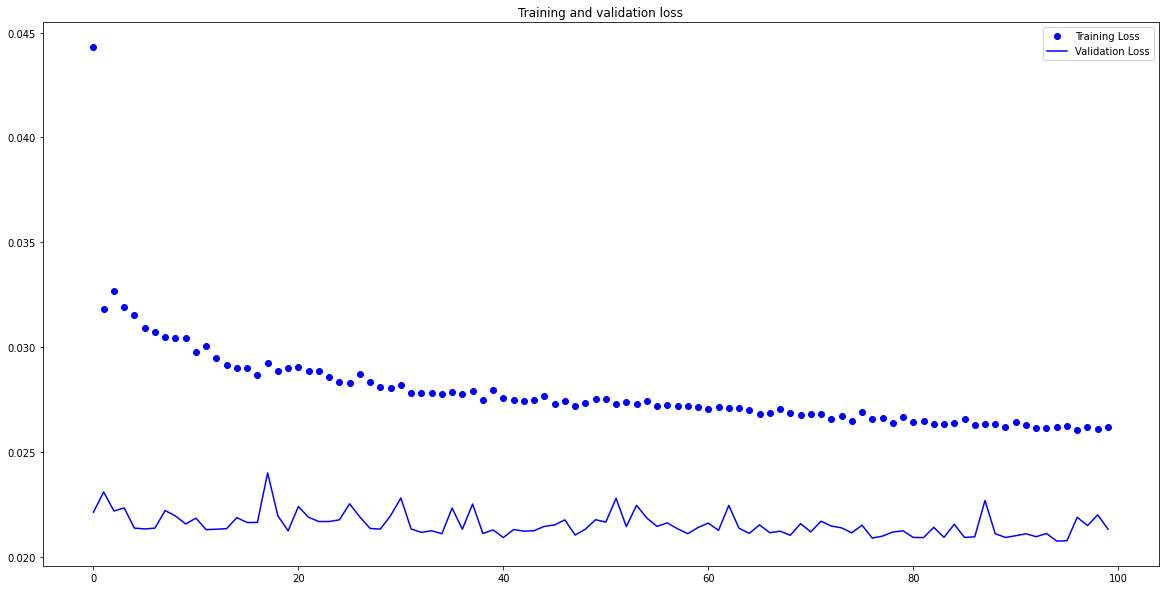

In [72]:
# Visualize training & testing loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(facecolor='white', figsize=(20,10)) 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [68]:
# Evaluate MSE with Testing Data
model.evaluate(X_test, y_test, batch_size)

44/44 [==============================] - 0s 9ms/step - loss: 0.0213


0.021306931972503662

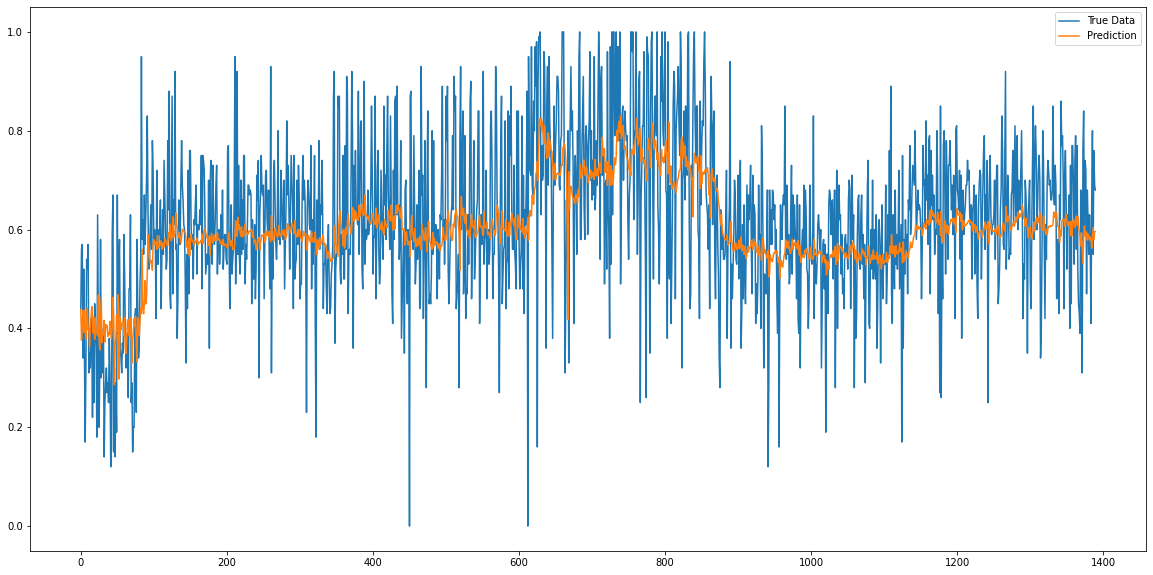

In [69]:
# Predict Testing Data & Visualize 
predicted_percentofbaseline = model.predict(X_test)
plot_results(predicted_percentofbaseline, y_test)

In [82]:
# Initialising the RNN
model2 = Sequential()

In [83]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model2.add(LSTM(units = 60,return_sequences = True,input_shape = (X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 120))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1, activation = "linear"))

In [84]:
# Compiling the RNN
# Code here
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 60, 60)            14880     
                                                                 
 dropout_22 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_24 (LSTM)              (None, 120)               86880     
                                                                 
 dropout_23 (Dropout)        (None, 120)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 121       
                                                                 
Total params: 101,881
Trainable params: 101,881
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
history = model2.fit(X_train, y_train, batch_size, epoch, validation_data = (X_test, y_test))

Epoch 1/100
180/180 [==============================] - 5s 14ms/step - loss: 0.0390 - val_loss: 0.0233
Epoch 2/100
180/180 [==============================] - 2s 9ms/step - loss: 0.0311 - val_loss: 0.0219
Epoch 3/100
180/180 [==============================] - 2s 10ms/step - loss: 0.0298 - val_loss: 0.0221
Epoch 4/100
180/180 [==============================] - 2s 9ms/step - loss: 0.0297 - val_loss: 0.0226
Epoch 5/100
180/180 [==============================] - 2s 9ms/step - loss: 0.0300 - val_loss: 0.0221
Epoch 6/100
180/180 [==============================] - 2s 9ms/step - loss: 0.0294 - val_loss: 0.0218
Epoch 7/100
180/180 [==============================] - 2s 10ms/step - loss: 0.0290 - val_loss: 0.0228
Epoch 8/100
180/180 [==============================] - 2s 10ms/step - loss: 0.0293 - val_loss: 0.0213
Epoch 9/100
180/180 [==============================] - 2s 11ms/step - loss: 0.0293 - val_loss: 0.0213
Epoch 10/100
180/180 [==============================] - 3s 15ms/step - loss: 0.0288 - 

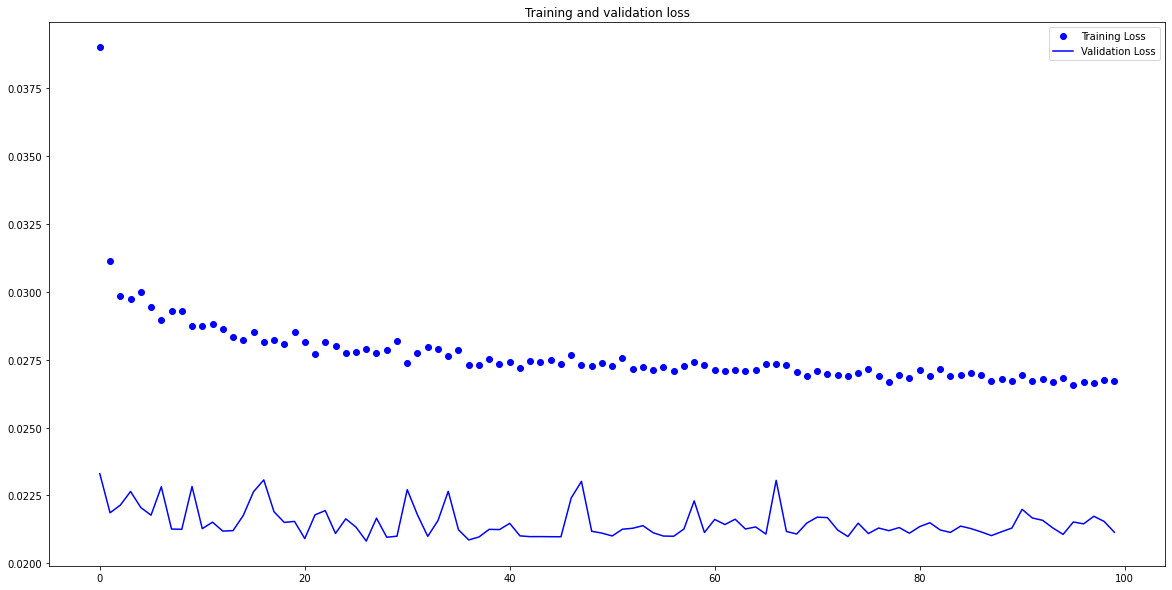

In [86]:
# Visualize training & testing loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(facecolor='white', figsize=(20,10)) 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [87]:
# Evaluate MSE with Testing Data
model2.evaluate(X_test, y_test, batch_size)

44/44 [==============================] - 0s 5ms/step - loss: 0.0211


0.021149294450879097

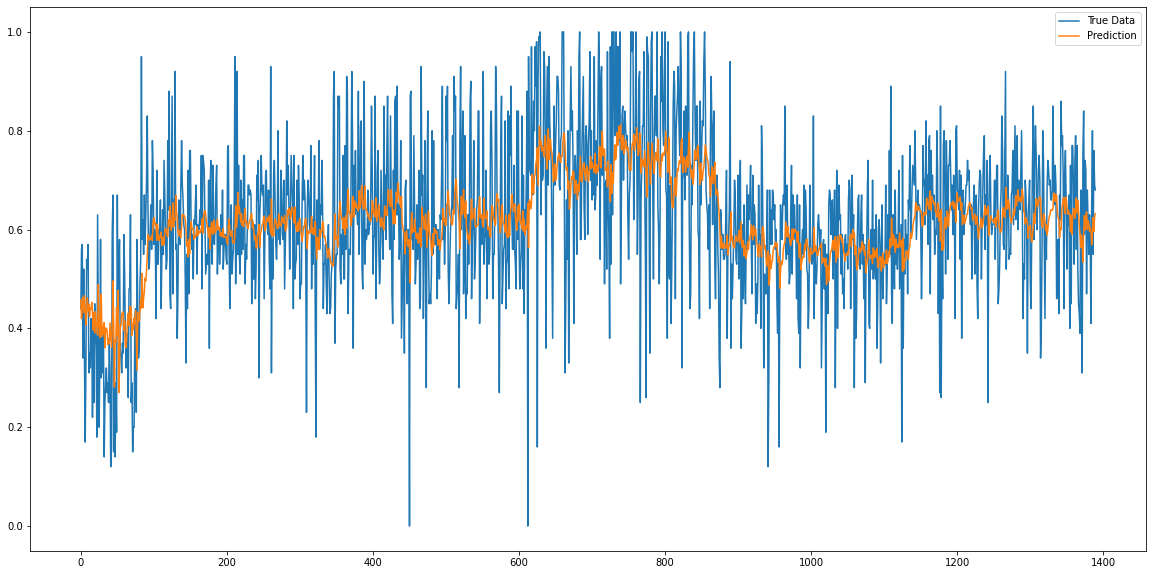

In [88]:
#Let's use the model and predict the percent of baseline
predicted_percentofbaseline2 = model2.predict(X_test)
plot_results(predicted_percentofbaseline2,y_test)